In [37]:
import networkx as nx
import pandas as pd
from datasets import load_dataset


liar_data = pd.DataFrame(load_dataset("liar")['test'])
print(type(liar_data))

Found cached dataset liar (C:/Users/Alex/.cache/huggingface/datasets/liar/default/1.0.0/479463e757b7991eed50ffa7504d7788d6218631a484442e2098dabbf3b44514)
100%|██████████| 3/3 [00:00<00:00, 311.56it/s]


<class 'pandas.core.frame.DataFrame'>


In [48]:

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph for each speaker
speakers = liar_data['speaker'].unique()
for speaker in speakers:
    G.add_node(speaker)

# Add edges to the graph for each pair of speakers who appear in the same context
contexts = liar_data['context'].unique()
for context in contexts:
    speakers_in_context = liar_data.loc[liar_data['context'] == context]['speaker']
    for speaker1 in speakers_in_context:
        for speaker2 in speakers_in_context:
            if speaker1 != speaker2:
                G.add_edge(speaker1, speaker2)
                print(speaker1, speaker2)

# Compute some network statistics
print("Number of nodes:", len(G.nodes))
print("Number of edges:", len(G.edges))
print("Average degree:", nx.average_degree_connectivity(G))


katrina-shankland barack-obama
katrina-shankland john-boehner
katrina-shankland john-kasich
katrina-shankland barack-obama
katrina-shankland john-boehner
katrina-shankland harry-reid
katrina-shankland paul-ryan
katrina-shankland teresa-fedor
katrina-shankland chris-christie
katrina-shankland sheila-oliver
katrina-shankland bill-johnson
katrina-shankland john-kasich
katrina-shankland kathleen-clyde
katrina-shankland john-kasich
katrina-shankland rick-scott
katrina-shankland john-kasich
barack-obama katrina-shankland
barack-obama john-boehner
barack-obama john-kasich
barack-obama john-boehner
barack-obama harry-reid
barack-obama paul-ryan
barack-obama teresa-fedor
barack-obama chris-christie
barack-obama sheila-oliver
barack-obama bill-johnson
barack-obama john-kasich
barack-obama kathleen-clyde
barack-obama john-kasich
barack-obama rick-scott
barack-obama john-kasich
john-boehner katrina-shankland
john-boehner barack-obama
john-boehner john-kasich
john-boehner barack-obama
john-boehner 

In [46]:
print(G.nodes())
print(G.edges())


['rick-perry', 'katrina-shankland', 'donald-trump', 'rob-cornilles', 'state-democratic-party-wisconsin', 'brendan-doherty', 'stand-children-tennessee', 'john-boehner', 'sean-patrick-maloney', 'mike-pence', 'mike-berlon', 'bill-flores', 'viral-image', 'facebook-posts', 'chris-abele', 'rick-santorum', 'tom-niehaus', 'marsha-blackburn', 'hillary-clinton', 'sarah-palin', 'chris-sgro', 'marco-rubio', 'marijuana-policy-project', 'republican-party-florida', 'lindsey-graham', 'republican-national-committee-republican', 'cliff-stearns', 'cory-gardner', 'barack-obama', 'democratic-congressional-campaign-committee', 'mamie-locke', 'herman-cain', 'rick-scott', 'jeanne-shaheen', 'dennis-kucinich', 'kevin-brady', 'mitt-romney', 'doonesbury', 'drew-springer', 'michele-bachmann', 'robert-menendez', 'steve-brown', 'national-rifle-association', 'jeb-bush', 'david-dewhurst', 'jeff-flake', 'committee-our-childrens-future', 'steven-costantino', 'hank-johnson', 'russell-pearce', 'chris-matthews', 'carlos-cu

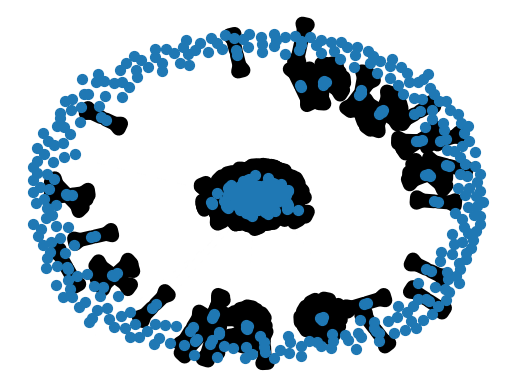

In [50]:
# Visualize the graph
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, width=10, alpha=1)
plt.axis('off')
plt.show()

c:\Users\Alex\miniconda3\lib\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


TypeError: draw() takes 0 positional arguments but 1 was given

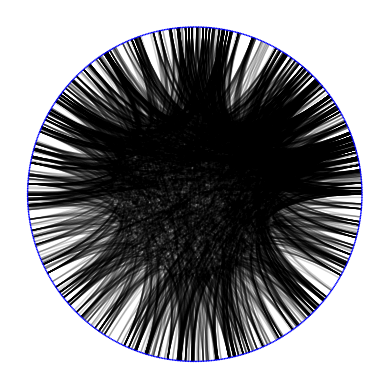

In [52]:
import nxviz as nv

# Create a CircosPlot object with the directed graph
c = nv.CircosPlot(G)

# Draw the CircosPlot
c.draw()

# Show the plot
plt.show()